# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
from dotenv import load_dotenv
from pathlib import Path

env_path = Path('../API_codes.env')
load_dotenv(dotenv_path = env_path)

True

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

In [4]:
NEWS_API_KEY = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key = NEWS_API_KEY)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = newsapi.get_top_headlines(q="Bitcoin", language="en", country="us")
btc_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [6]:
btc_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by = "relevancy")
btc_articles

{'status': 'ok',
 'totalResults': 3565,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by = "relevancy")
eth_articles

{'status': 'ok',
 'totalResults': 1214,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
# btc_df = pd.DataFrame.from_dict(btc_articles["articles"])
# btc_df.head()

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()



,text,compound,positive,negative,neutral
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,0.000,1.000
1,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.000,0.838
2,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.154,0.846
3,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
4,Cryptocurrencies like bitcoin are a fun way to...,0.2732,0.098,0.071,0.831


In [9]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,text,compound,positive,negative,neutral
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,0.000,1.000
1,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939
3,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.000,0.838
4,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.166500,0.057750,0.034800,0.907450
std,0.431206,0.056728,0.067823,0.069005
min,-0.718400,0.000000,0.000000,0.797000
25%,0.000000,0.000000,0.000000,0.844000
50%,0.250000,0.062500,0.000000,0.910000
75%,0.507000,0.090000,0.035000,0.951250
max,0.726900,0.186000,0.203000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.156794,0.051294,0.013882,0.934824
std,0.308951,0.057579,0.035105,0.069378
min,-0.421500,0.000000,0.000000,0.783000
25%,0.000000,0.000000,0.000000,0.887000
50%,0.000000,0.046000,0.000000,0.939000
75%,0.401900,0.085000,0.000000,1.000000
max,0.680800,0.162000,0.132000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest compound score, thus highest overall positive sentiment

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [30]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cliu1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [31]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [32]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

In [33]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw_addons = {'said',
                'sent',
                'found',
                'etc'}
    
    # Convert the words to lowercase
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]").sub('',text)
    words = word_tokenize(regex)
    
    # Remove the stop words    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    
    return tokens


In [34]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
btc_tokens = []

for text in btc_df['text']:
    tokens = (tokenizer(text))
    btc_tokens.append({'Tokens': tokens})
    
btc_token_df = pd.DataFrame.from_dict(btc_tokens)
btc_df['Tokens'] = btc_token_df
btc_df.head()

,text,compound,positive,negative,neutral,Tokens
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,0.000,1.000,"[paypal, partnered, cryptocurrency, company, p..."
1,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.000,0.838,"[paypal, rolling, cryptocurrency, support, lat..."
2,The Financial Crimes Enforcement Network (FinC...,-0.7184,0.000,0.154,0.846,"[financial, crimes, enforcement, network, finc..."
3,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935,"[image, copyrightchandler, guoimage, caption, ..."
4,Cryptocurrencies like bitcoin are a fun way to...,0.2732,0.098,0.071,0.831,"[cryptocurrencies, like, bitcoin, fun, way, sk..."


In [36]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_tokens = []

for text in eth_df['text']:
    tokens = (tokenizer(text))
    eth_tokens.append({'Tokens': tokens})
    
eth_token_df = pd.DataFrame.from_dict(eth_tokens)
eth_df['Tokens'] = eth_token_df
eth_df.head()

,text,compound,positive,negative,neutral,Tokens
0,PayPal has partnered with cryptocurrency compa...,0.0000,0.000,0.000,1.000,"[paypal, partnered, cryptocurrency, company, p..."
1,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000,"[breitling, partnering, arianee, issue, new, k..."
2,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939,"[september, min, readopinions, expressed, entr..."
3,PayPal is rolling out cryptocurrency support l...,0.6808,0.162,0.000,0.838,"[paypal, rolling, cryptocurrency, support, lat..."
4,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783,"[portions, global, economy, melted, emerging, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [40]:
from collections import Counter
from nltk import ngrams

In [43]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
# Counter(ngrams(tokenizer(btc_df.text.str.cat()), 2)).most_common(20)
btc_token_list = tokenizer(btc_df.text.str.cat())

Counter(ngrams(btc_token_list, 2)).most_common(30)

[(('satoshi', 'nakaboto'), 10),
 (('bitcoin', 'btc'), 6),
 (('charsby', 'reuters'), 5),
 (('charsour', 'robot'), 5),
 (('robot', 'colleague'), 5),
 (('colleague', 'satoshi'), 5),
 (('nakaboto', 'writes'), 5),
 (('writes', 'bitcoin'), 5),
 (('every', 'fucking'), 5),
 (('fucking', 'daywelcome'), 5),
 (('daywelcome', 'another'), 5),
 (('another', 'edition'), 5),
 (('edition', 'bitcoin'), 5),
 (('bitcoin', 'today'), 5),
 (('today', 'satoshi'), 5),
 (('nakaboto', 'tell'), 5),
 (('tell', 'whats'), 5),
 (('whats', 'going'), 5),
 (('going', 'bitcoin'), 5),
 (('btc', 'every'), 4),
 (('reuters', 'stafffile'), 3),
 (('stafffile', 'photo'), 3),
 (('photo', 'representations'), 3),
 (('representations', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('illustration', 'taken'), 3)]

In [44]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_token_list = tokenizer(eth_df.text.str.cat())

Counter(ngrams(btc_token_list, 2)).most_common(30)

[(('satoshi', 'nakaboto'), 10),
 (('bitcoin', 'btc'), 6),
 (('charsby', 'reuters'), 5),
 (('charsour', 'robot'), 5),
 (('robot', 'colleague'), 5),
 (('colleague', 'satoshi'), 5),
 (('nakaboto', 'writes'), 5),
 (('writes', 'bitcoin'), 5),
 (('every', 'fucking'), 5),
 (('fucking', 'daywelcome'), 5),
 (('daywelcome', 'another'), 5),
 (('another', 'edition'), 5),
 (('edition', 'bitcoin'), 5),
 (('bitcoin', 'today'), 5),
 (('today', 'satoshi'), 5),
 (('nakaboto', 'tell'), 5),
 (('tell', 'whats'), 5),
 (('whats', 'going'), 5),
 (('going', 'bitcoin'), 5),
 (('btc', 'every'), 4),
 (('reuters', 'stafffile'), 3),
 (('stafffile', 'photo'), 3),
 (('photo', 'representations'), 3),
 (('representations', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'picture'), 3),
 (('picture', 'illustration'), 3),
 (('illustration', 'taken'), 3)]

In [45]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [46]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(tokenizer(btc_df.text.str.cat()))

[('bitcoin', 25),
 ('reuters', 13),
 ('satoshi', 10),
 ('nakaboto', 10),
 ('another', 6),
 ('taken', 6),
 ('btc', 6),
 ('cryptocurrency', 5),
 ('charsby', 5),
 ('charsour', 5)]

In [47]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(tokenizer(eth_df.text.str.cat()))

[('cryptocurrency', 10),
 ('bitcoin', 10),
 ('paypal', 8),
 ('digital', 7),
 ('wednesday', 6),
 ('us', 5),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5),
 ('new', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

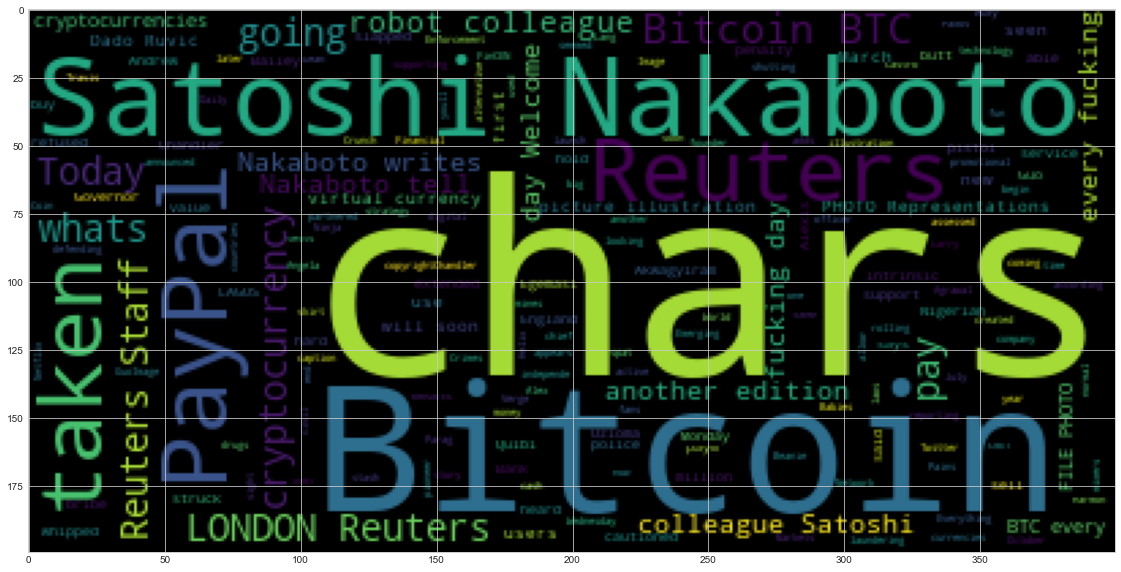

In [55]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(btc_df.text.str.cat())
plt.imshow(btc_wc)

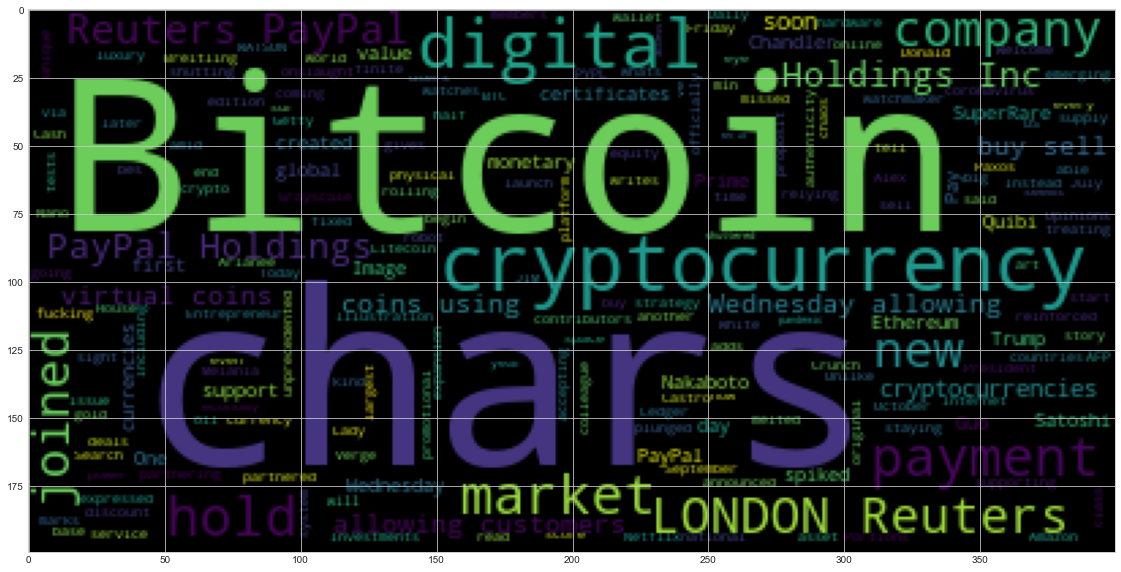

In [56]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [57]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [59]:
import spacy
from spacy import displacy

In [60]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [64]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
btc_str = btc_df.text.str.cat()
btc_str

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars]The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars]Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]Cryptocurrencies like bitcoin are a fun way to skirt money-laundering laws and pay for drugs, but, according to reporting by Reuters,

In [65]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_str)


# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [66]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style = 'ent')

In [67]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
chars]The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
GuoImage ORG
Chandler Guo PERSON
one CARDINAL
Chandler Guo PERSON
bitcoin GPE
Reuters ORG
Beanie Babies WORK_OF_ART
chars]World News
 WORK_OF_ART
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
Reuters ORG
Ozioma Egemasi ORG
Nigerian NORP
first ORDINAL
Parag Agrawal ORG
Twitter ORG
Travis Scot PERSON
305 million CARDINAL
Bitcoin GPE
Angela Lang PERSON
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
Dado Ruvic PERSON
LONDON GPE
Reuters ORG
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PE

---

## Ethereum NER

In [68]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
eth_str = eth_df.text.str.cat()
eth_str

"PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars]September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars]PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars]Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid t

In [69]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(eth_str)


# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Ethereum NER"

In [70]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style = 'ent')

In [71]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
Arianee PERSON
30 DATE
2020 DATE
8 CARDINAL
half CARDINAL
2020 DATE
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
2020 DATE
Grayscale Investments ORG
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Prime Day DATE
One CARDINAL
the Ledger Nano S WORK_OF_ART
39.99 MONEY
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Donald Trump PERSON
First ORDINAL
Lady Melania Trump PERSON
the White House ORG
July 7, 2020 DATE
JIM WATSON PERSON
Getty Images ORG
Friday DATE
Bitcoin GPE
Wednesday DATE
PayPal ORG
Bitcoin GPE
Ethereum GPE
Bitcoin Cash GPE
Litecoin PERSON
Bitcoins NORP
SuperRare ORG
SuperRare